# Assgn_08 Calculating the total amount of coin money  

- Load 'input image' (Korean Coin)
- Write codes of calculating total amount of coin money using opencv python with explanation
- Print out the summation result with images of the intermediate process
 
※ You can use other images (i.e. your country or U.S. coins image) but do the same process and the result.

- filename and type : yourname_assgn_08.pdf
- Due Date : 13 Nov 0900 a.m. (**2 wks** from now, Monday 0900 a.m. 1 day before the 14 Nov class)

₩500 x 2 = ₩1000 (the biggest silver, front '₩500', back '오백원')
₩100 x 5 = ₩500 (2nd largest silver, front '₩100', back '백원')
₩50 x 2 = ₩100 (the smallest silver, front '₩50', back '오십원')
₩10 x (old) 2 = ₩20 (old, yellow, front '₩10', back '십원')
₩10 x (new) 2 = ₩20 (new, bronze, front '₩10', back '십원')
Total value: ₩1640


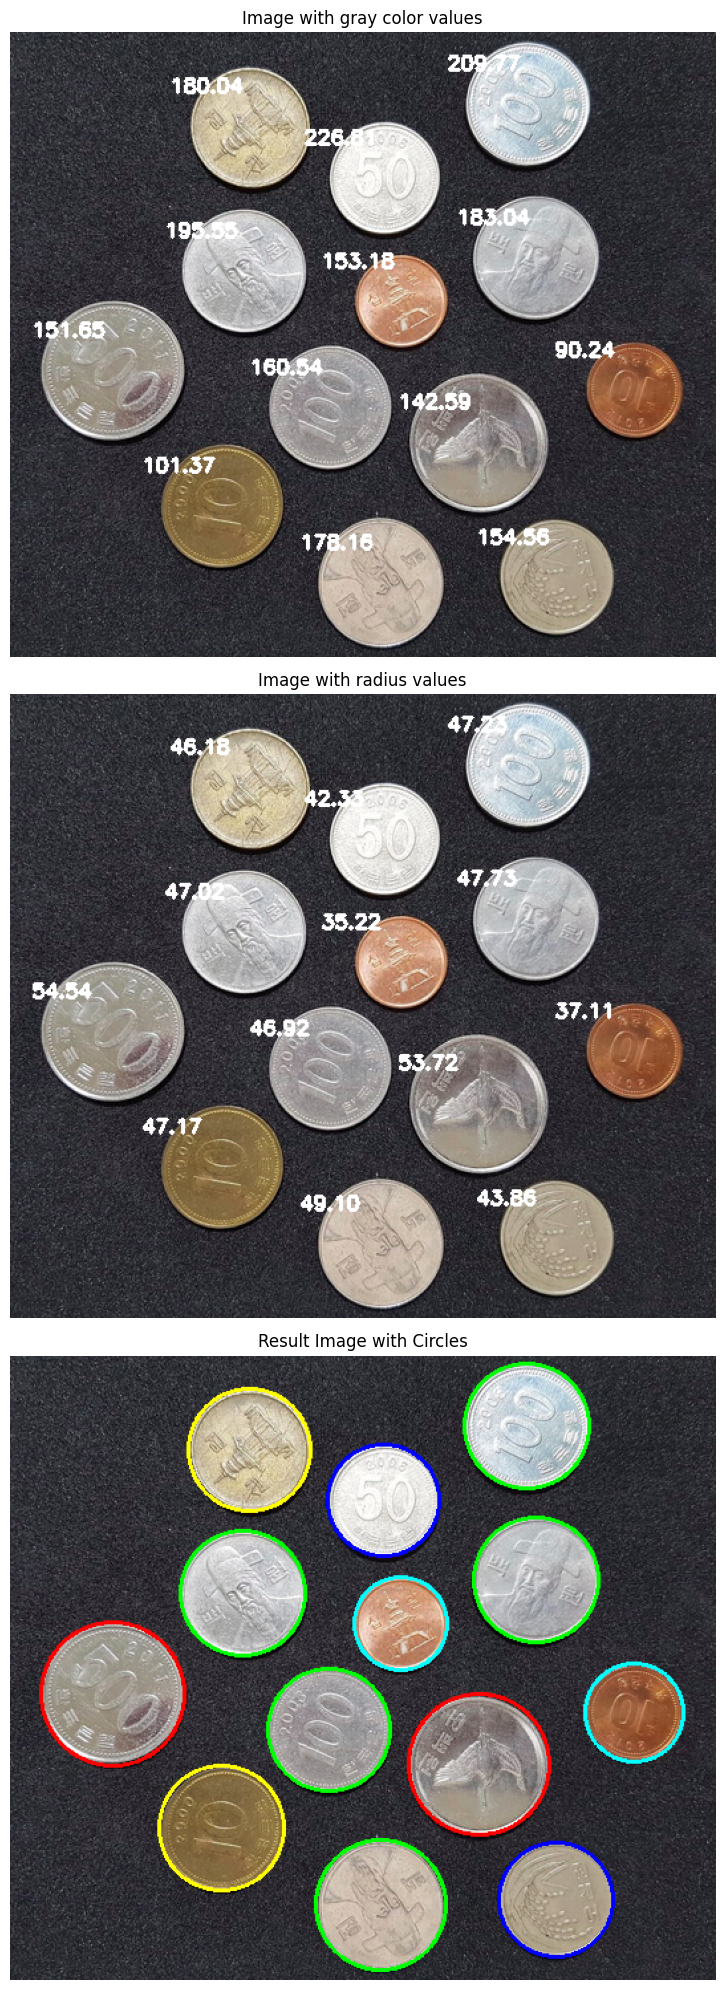

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = './images/practice_img/coins_spread2.png'
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not open the image file.")
    exit()

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur
blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred_image, 50, 150)

# Define the colors
coin_colors = {
    '₩500': (0, 0, 255),  # Red for ₩500
    '₩100': (0, 255, 0),  # Green for ₩100
    '₩50': (255, 0, 0),   # Blue for ₩50
    '₩10_old': (0, 255, 255),  # Yellow for old ₩10
    '₩10_new': (255, 255, 0)   # Cyan for new ₩10
}

# Find contours
# Adjust for OpenCV version differences
if cv2.__version__.startswith('3.'):
    _, contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
else:
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

coin_counts = {
    '₩500': 0,
    '₩100': 0,
    '₩50': 0,
    '₩10_old': 0,
    '₩10_new': 0
}

total_value = 0

img_with_radius = image.copy()
img_with_colors = image.copy()

# Loop over the contours
for contour in contours:
    # Approximate the contour by a circle
    (center, radius) = cv2.minEnclosingCircle(contour)

    # Compute the area, perimeter, and centroid
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    moments = cv2.moments(contour)

    if moments["m00"] != 0:
        centroid_x = int(moments["m10"] / moments["m00"])
        centroid_y = int(moments["m01"] / moments["m00"])
    else:
        centroid_x, centroid_y = 0, 0

    # Create a mask for the current contour
    mask = np.zeros(gray_image.shape, dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # Compute the mean color of the contour
    mean_val = cv2.mean(image, mask=mask)
    mean_color = (mean_val[0], mean_val[1], mean_val[2])
    gray_value = 0.299 * mean_color[0] + 0.587 * mean_color[1] + 0.114 * mean_color[2]

    # Draw the contour and the centroid on the image
    cv2.putText(img_with_radius, f"{radius:.2f}", (centroid_x - 60, centroid_y - 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    cv2.putText(img_with_colors, f"{gray_value:.2f}", (centroid_x - 60, centroid_y - 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Classify the coin based on its size and draw a circle around it with the corresponding color
    if 52 < radius < 55 and gray_value > 140:
        coin_counts['₩500'] += 1
        total_value += 500
        cv2.circle(image, (int(center[0]), int(center[1])), int(radius), coin_colors['₩500'], 2)
    elif 46.5 < radius < 50 and gray_value > 160:
        coin_counts['₩100'] += 1
        total_value += 100
        cv2.circle(image, (int(center[0]), int(center[1])), int(radius), coin_colors['₩100'], 2)
    elif 42 < radius < 44:
        coin_counts['₩50'] += 1
        total_value += 50
        cv2.circle(image, (int(center[0]), int(center[1])), int(radius), coin_colors['₩50'], 2)
    elif 34 < radius < 38:
        coin_counts['₩10_new'] += 1
        total_value += 10
        cv2.circle(image, (int(center[0]), int(center[1])), int(radius), coin_colors['₩10_new'], 2)
    else:
        coin_counts['₩10_old'] += 1
        total_value += 10
        cv2.circle(image, (int(center[0]), int(center[1])), int(radius), coin_colors['₩10_old'], 2)

print(f"₩500 x {coin_counts['₩500']} = ₩{coin_counts['₩500'] * 500} (the biggest silver, front '₩500', back '오백원')")
print(f"₩100 x {coin_counts['₩100']} = ₩{coin_counts['₩100'] * 100} (2nd largest silver, front '₩100', back '백원')")
print(f"₩50 x {coin_counts['₩50']} = ₩{coin_counts['₩50'] * 50} (the smallest silver, front '₩50', back '오십원')")
print(f"₩10 x (old) {coin_counts['₩10_old']} = ₩{coin_counts['₩10_old'] * 10} (old, yellow, front '₩10', back '십원')")
print(f"₩10 x (new) {coin_counts['₩10_new']} = ₩{coin_counts['₩10_new'] * 10} (new, bronze, front '₩10', back '십원')")
print(f"Total value: ₩{total_value}")

# Display images
plt.figure(figsize=(20, 20))

# Display the image with gray color values
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(img_with_colors, cv2.COLOR_BGR2RGB))
plt.title('Image with gray color values')
plt.axis('off')

# Image with radius values
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(img_with_radius, cv2.COLOR_BGR2RGB))
plt.title('Image with radius values')
plt.axis('off')

# Result image with circles
plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Result Image with Circles')
plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
